In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
import io
data=pd.read_csv("RyanairFlights.csv",encoding="latin1")
data.head(2)

,Booking Date,Date,Route Origin Airport,Route Origin Name,Origin_Airport Name,Origin_City,Origin_Country,Origin_Airport Code,Origin_ICAO Code,Origin_Latitude,...,Segment Destination,Segment Duration,Segment Distance (km),Segment Origin Time - Local,Segment Origin Time - UTC,Segment Destination Time - Local,Segment Destination Time - UTC,Request Time UTC,Departure_Time,Arrival_Time
0,5/11/2017,1/1/2018,LGW,London (Gatwick),London Gatwick Airport,London,United Kingdom,LGW,EGKK,51.148102,...,DUB,1:25,485.675897,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,13:15,14:40
1,5/11/2017,1/1/2018,LGW,London (Gatwick),London Gatwick Airport,London,United Kingdom,LGW,EGKK,51.148102,...,DUB,1:25,485.675897,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,14:45,16:10


In [ ]:
data.columns

Index(['Booking Date', 'Date', 'Route Origin Airport', 'Route Origin Name',
       'Origin_Airport Name', 'Origin_City', 'Origin_Country',
       'Origin_Airport Code', 'Origin_ICAO Code', 'Origin_Latitude',
       'Origin_Longitude', 'Origin_Altitude', 'Origin_Timezone',
       'Route Destination Airport', 'Route Destination Name',
       'Destination_Airport Name', 'Destination_City', 'Destination_Country',
       'Destination_Airport Code', 'Destination_ICAO Code',
       'Destination_Latitude', 'Destination_Longitude', 'Destination_Altitude',
       'Destination_Timezone', 'Flight Key', 'Flight Duration', 'Fare Key',
       'Fare Class', 'Fare Type', 'Fare Currency', 'Fare Amount',
       'Fare Published', 'Fare Discounted', 'Fare Discount Pct',
       'Fare Has Promo', 'Segment Number', 'Segment Flight Number',
       'Segment Origin', 'Segment Destination', 'Segment Duration',
       'Segment Distance (km)', 'Segment Origin Time - Local',
       'Segment Origin Time - UTC', 'Segm

In [ ]:
data.shape

(725775, 48)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725775 entries, 0 to 725774
Data columns (total 48 columns):
Booking Date                        725775 non-null object
Date                                725775 non-null object
Route Origin Airport                725775 non-null object
Route Origin Name                   725775 non-null object
Origin_Airport Name                 725775 non-null object
Origin_City                         725775 non-null object
Origin_Country                      725775 non-null object
Origin_Airport Code                 725775 non-null object
Origin_ICAO Code                    725775 non-null object
Origin_Latitude                     725775 non-null float64
Origin_Longitude                    725775 non-null float64
Origin_Altitude                     725775 non-null int64
Origin_Timezone                     725775 non-null object
Route Destination Airport           725775 non-null object
Route Destination Name              725775 non-null object
Des

In [ ]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)


['Booking Date', 'Date', 'Route Origin Airport', 'Route Origin Name', 'Origin_Airport Name', 'Origin_City', 'Origin_Country', 'Origin_Airport Code', 'Origin_ICAO Code', 'Origin_Timezone', 'Route Destination Airport', 'Route Destination Name', 'Destination_Airport Name', 'Destination_City', 'Destination_Country', 'Destination_Airport Code', 'Destination_ICAO Code', 'Destination_Timezone', 'Flight Key', 'Flight Duration', 'Fare Key', 'Fare Class', 'Fare Type', 'Fare Currency', 'Fare Discounted', 'Fare Has Promo', 'Segment Flight Number', 'Segment Origin', 'Segment Destination', 'Segment Duration', 'Departure_Time', 'Arrival_Time']
['Origin_Latitude', 'Origin_Longitude', 'Origin_Altitude', 'Destination_Latitude', 'Destination_Longitude', 'Destination_Altitude', 'Fare Amount', 'Fare Published', 'Fare Discount Pct', 'Segment Number', 'Segment Distance (km)', 'Segment Origin Time - Local', 'Segment Origin Time - UTC', 'Segment Destination Time - Local', 'Segment Destination Time - UTC', 'Req

In [ ]:

data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Origin_Latitude,725775.0,4.611488e+01,6.898541,2.793190e+01,4.063210e+01,4.567390e+01,5.188500e+01,6.141410e+01
Origin_Longitude,725775.0,4.963758e+00,9.879338,-2.709080e+01,-2.274950e+00,2.760550e+00,1.235190e+01,3.493580e+01
Origin_Altitude,725775.0,3.857741e+02,447.430705,-1.100000e+01,8.000000e+01,2.570000e+02,4.270000e+02,2.776000e+03
Destination_Latitude,725775.0,4.614588e+01,6.896316,2.793190e+01,4.065760e+01,4.567390e+01,5.188500e+01,6.141410e+01
Destination_Longitude,725775.0,4.996769e+00,9.872733,-2.709080e+01,-2.274950e+00,2.760550e+00,1.235190e+01,3.493580e+01
Destination_Altitude,725775.0,3.848736e+02,446.586441,-1.100000e+01,7.800000e+01,2.570000e+02,4.270000e+02,2.776000e+03
Fare Amount,706459.0,2.605245e+02,2030.699935,2.990000e+00,2.879000e+01,4.499000e+01,7.899000e+01,9.393900e+04
Fare Published,706459.0,2.646627e+02,2048.706724,2.990000e+00,2.899000e+01,4.599000e+01,7.999000e+01,9.393900e+04
Fare Discount Pct,706459.0,1.527321e+00,5.049508,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Segment Number,725775.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
data[cat].describe().T

,count,unique,top,freq
Booking Date,725775,1,5/11/2017,725775
Date,725775,355,17/08/2018,2352
Route Origin Airport,725775,206,STN,60186
Route Origin Name,725775,206,London (Stansted),60186
Origin_Airport Name,725775,206,London Stansted Airport,60186
Origin_City,725775,201,London,69336
Origin_Country,725775,32,Italy,138121
Origin_Airport Code,725775,206,STN,60186
Origin_ICAO Code,725775,206,EGSS,60186
Origin_Timezone,725775,1,airport,725775


In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,Booking Date,Date,Route Origin Airport,Route Origin Name,Origin_Airport Name,Origin_City,Origin_Country,Origin_Airport Code,Origin_ICAO Code,Origin_Latitude,...,Segment Destination,Segment Duration,Segment Distance (km),Segment Origin Time - Local,Segment Origin Time - UTC,Segment Destination Time - Local,Segment Destination Time - UTC,Request Time UTC,Departure_Time,Arrival_Time


In [ ]:
print('**Total datapoints of null values in the data**:',19316)
print('**Total percentage of null values in the data**:',(19316/725775)*100)
print(data.isnull().sum())

**Total datapoints of null values in the data**: 19316
**Total percentage of null values in the data**: 2.6614308842272054
Booking Date                            0
Date                                    0
Route Origin Airport                    0
Route Origin Name                       0
Origin_Airport Name                     0
Origin_City                             0
Origin_Country                          0
Origin_Airport Code                     0
Origin_ICAO Code                        0
Origin_Latitude                         0
Origin_Longitude                        0
Origin_Altitude                         0
Origin_Timezone                         0
Route Destination Airport               0
Route Destination Name                  0
Destination_Airport Name                0
Destination_City                        0
Destination_Country                     0
Destination_Airport Code                0
Destination_ICAO Code                   0
Destination_Latitude                 

### As we are having only 2.66% of the datapoints as our outlier from 7 lakh rows, it will not affect the prediction model so we are removing the NAN values from the data

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.shape

(706459, 48)

## **FEATURE** **SELECTION**

In [ ]:
a1=(((data['Fare Discount Pct'].value_counts())/len(data))*100).cumsum()
a2=(((data['Fare Discounted'].value_counts())/len(data))*100).cumsum()
print('Percentage of each classes in the Fare Discount Pct feature:\n',a1)
print('Percentage of each classes in the Fare Discount feature:\n',a2)


Percentage of each classes in the Fare Discount Pct feature:
 0.0      91.005281
20.0     97.283777
10.0    100.000000
Name: Fare Discount Pct, dtype: float64
Percentage of each classes in the Fare Discount feature:
 False     91.005281
True     100.000000
Name: Fare Discounted, dtype: float64


In [ ]:
data.groupby('Origin_City')['Origin_Airport Name'].value_counts()

Origin_City  Origin_Airport Name                          
Aalborg      Aalborg Airport                                   201
Aarhus       Aarhus Airport                                    413
Aberdeen     Aberdeen Dyce Airport                             327
Agadir       Al Massira Airport                                348
Alghero      Alghero-Fertilia Airport                         1226
                                                              ... 
Warsaw       Warsaw Chopin Airport                             331
Weeze        Weeze Airport                                    4887
Wroclaw      Copernicus WrocÃÂÃÂ
ÃÂ¢ÃÂÃÂaw Airport    4087
Zadar        Zemunik Airport                                   936
Zaragoza     Zaragoza Air Base                                 579
Name: Origin_Airport Name, Length: 206, dtype: int64

In [ ]:
print(data['Origin_Timezone'].value_counts())
print(data['Destination_Timezone'].value_counts())

airport    706459
Name: Origin_Timezone, dtype: int64
airport    706459
Name: Destination_Timezone, dtype: int64


***Inferences on Dropping the columns***

a.Fare Discount Pct and Fare Discounted : Columns are dropped because we are having around 91% of the rows as 0, so it will contribute well to our model

b.Destination_Airport Name/Destination_City/ICAO Destination/Route_Destination_Airport/segment destination , Origin_City/Origin_Airport Name/Route origin airport/ICAO origin airport/segement origin - both columns shares the same information so we are removing one column

c. Bookingdate and Request time UTC - shares the same info so dropping one column

d. segement origin time/segment origin time UTC/segment destination time local/segment destination time UTC/'Segment Flight Number'/'Segment Origin'/'Segment Destination'/'Segment Duration' - are droppedd because it  has  no meaning as Ryanair flight company doesnot  has  connecting flight services

e.'Destination_Latitude'/'Destination_Longitude'/'Destination_Altitude'/'originn_Latitude','origin_Longitude','originAltitude' - this information doesnot contribute information for our flightfare prediction purpose.

f.Flight Key -Best I can tell is that this is the closest thing to a unique key that Ryanair published about each flight. this column is dropped because it has unique values for each row so no information form this column and the details on the arrival and  departure timme is already in the existing other columns.

g. Fare Key  - it gives the unique values of the different fare ranges , so this column has the same informaton as of the dependent variable so we are dropping thhis column.

h. Origin_Timezone/Destination_Timezone -  have only constatnt value so we are dropping these columns


In [ ]:
data.drop(['Origin_Country','Destination_Country','Fare Discount Pct','Fare Published','Destination_Airport Name','Fare Discounted','Origin_Airport Name','Origin_Timezone','Request Time UTC','Segment Number','Fare Has Promo','Fare Type','Destination_Timezone','Segment Destination Time - UTC','Segment Destination Time - Local','Segment Origin Time - Local','Segment Origin Time - UTC','Route Origin Airport','Route Origin Name','Origin_ICAO Code','Origin_Latitude','Origin_Longitude','Origin_Altitude','Destination_Airport Code','Destination_ICAO Code','Destination_Latitude','Destination_Longitude','Destination_Altitude','Route Destination Airport','Route Destination Name','Origin_Airport Code','Flight Key','Fare Key','Segment Flight Number','Segment Origin','Segment Destination','Segment Duration'],axis=1,inplace=True)

In [ ]:
#Here we are taking onnly fare currency as EURO and dropping others for two things
#1. As EUR Currency  itsel is having around 71% of the datapoints in the column
#2. For easing the computational process
data=data[data['Fare Currency']=='EUR'] # including only euro currrncy

In [ ]:
data.drop(['Fare Currency'],axis=1,inplace =True)
# We are dropping the Fare currency column as it is  having only constant value as EUR

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504606 entries, 17119 to 725774
Data columns (total 10 columns):
Booking Date             504606 non-null object
Date                     504606 non-null object
Origin_City              504606 non-null object
Destination_City         504606 non-null object
Flight Duration          504606 non-null object
Fare Class               504606 non-null object
Fare Amount              504606 non-null float64
Segment Distance (km)    504606 non-null float64
Departure_Time           504606 non-null object
Arrival_Time             504606 non-null object
dtypes: float64(2), object(8)
memory usage: 42.3+ MB


In [ ]:
# Change Date column from float format to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
#Changing the booking date format from int64 to datetime
data['Booking Date']=data['Booking Date'].astype('datetime64[ns]')
data.head(2)

,Booking Date,Date,Origin_City,Destination_City,Flight Duration,Fare Class,Fare Amount,Segment Distance (km),Departure_Time,Arrival_Time
17119,2017-05-11,2018-01-01,Dublin,London,1:25,F,132.99,485.675897,11:20,12:45
17120,2017-05-11,2018-01-01,Dublin,London,1:30,F,132.99,485.675897,12:50,14:20


In [ ]:
data.shape

(504606, 10)

### We are segregating origin and destination cities into samller and bigger cities based on mentor advice

## Segregating the Bigger Origin and Destination Cities

In [ ]:
((data['Origin_City'].value_counts())[0:20]) ####bigger origin city greater than 8k as Bigger

Dublin               37127
Bergamo              28504
Rome                 22942
Barcelona            21539
Madrid               18924
Charleroi            17584
Berlin               13422
Palma de Mallorca    12157
Malaga               11940
Porto                11562
Alicante             10777
Bologna              10228
Lisbon                9068
Beauvais              8563
Pisa                  8437
Valencia              8073
Eindhoven             8036
Treviso               7868
Palermo               7845
Catania               7828
Name: Origin_City, dtype: int64

In [ ]:
  ((data['Destination_City'].value_counts())[0:20]) ####Bigger destination city greater than 8K as bigger

London               49806
Bergamo              22824
Rome                 18453
Dublin               17433
Barcelona            15954
Madrid               14351
Charleroi            13303
Manchester           11409
Berlin               10294
Porto                10167
Bologna               8578
Palma de Mallorca     8080
Catania               7880
Palermo               7384
Lisbon                7213
Valencia              6764
Beauvais              6742
Brussels              6624
Pisa                  6494
Athens                6187
Name: Destination_City, dtype: int64

In [ ]:
top_origin=((data['Origin_City'].value_counts())[0:20]).index   #6k and above as bigger
top_destination=((data['Destination_City'].value_counts())[0:20]).index

## Segregating the smaller Origin and Destination Cities

In [ ]:
((data['Destination_City'].value_counts())[21:54])  #2k to 8k  as smaller

Edinburgh        6062
Treviso          6045
East Midlands    6040
Eindhoven        5961
Malaga           5659
Bari             5537
Krakow           5502
Birmingham       5398
Sevilla          5349
Warsaw           5265
Cologne          5215
Hahn             4938
Milano           4883
Budapest         4570
Liverpool        4532
Naples           4348
Ibiza            4218
Malta            4201
Alicante         4189
Bristol          4173
Tenerife         4026
Bucharest        4010
Cagliari         3865
Weeze            3782
Marseille        3717
Thessaloniki     3545
Marrakech        3418
Copenhagen       3349
Hamburg          3338
Faro             3307
Lamezia          3217
Brindisi         3174
Leeds            3111
Name: Destination_City, dtype: int64

In [ ]:
((data['Origin_City'].value_counts())[21:54])  # 2k to 8k as small ori and dest

Athens                   7732
Cologne                  7122
Tenerife                 7044
Malta                    6976
Faro                     6830
Brussels                 6631
Sevilla                  6335
Hahn                     5983
Bari                     5920
Milano                   5719
Naples                   5505
Marseille                5341
Ibiza                    5234
Weeze                    4887
Bucharest                4629
Arrecife                 4228
Cagliari                 4167
Thessaloniki             4101
Gerona                   3997
Gran Canaria             3935
Sofia                    3861
Brindisi                 3438
Lamezia                  3415
Bratislava               3139
Vilnius                  3128
Santiago                 3081
Toulouse                 2922
Riga                     2826
Hamburg                  2740
Nuernberg                2732
Torino                   2637
Karlsruhe/Baden-Baden    2461
Cork                     2389
Name: Orig

In [ ]:
small_destination=((data['Destination_City'].value_counts())[21:54]).index
small_origin=((data['Origin_City'].value_counts())[21:54]).index

### Bigger to Bigger code

In [ ]:
count=0
for i in top_origin:
    for j in top_destination:
        if i != j:
            if count==0:
                data1=data[(data['Origin_City']==i) & (data['Destination_City']==j)]
                count=count + 1
            else:
                data1=data1.append(data[(data['Origin_City']==i) & (data['Destination_City']==j)])

In [ ]:
data1['origin_type']='High flight frequency cities'
data1['Destination_type']='High flight frequency cities'

In [ ]:
data1.shape

(126736, 12)

Bigger to Smaller code

In [ ]:
count=0
for i in top_origin:
    for j in small_destination:
        if i != j:
            if count==0:
                data2=data[(data['Origin_City']==i) & (data['Destination_City']==j)]
                count=count + 1
            else:
                data2=data2.append(data[(data['Origin_City']==i) & (data['Destination_City']==j)])

In [ ]:
data2['origin_type']='High flight frequency cities'
data2['Destination_type']='low flight frequency cities'

In [ ]:

data2.shape

(91978, 12)

## smaller to Bigger

In [ ]:
count=0
for i in small_origin:
    for j in top_destination:
        if i != j:
            if count==0:
                data3=data[(data['Origin_City']==i) & (data['Destination_City']==j)]
                count=count + 1
            else:
                data3=data3.append(data[(data['Origin_City']==i) & (data['Destination_City']==j)])

In [ ]:
data3['origin_type']='low flight frequency cities'
data3['Destination_type']='High flight frequency cities'

In [ ]:
data3.shape

(84977, 12)

## Smaller to Smaller

In [ ]:
count=0
for i in small_origin:
    for j in small_destination:
        if i != j:
            if count==0:
                data4=data[(data['Origin_City']==i) & (data['Destination_City']==j)]
                count=count + 1
            else:
                data4=data4.append(data[(data['Origin_City']==i) & (data['Destination_City']==j)])

In [ ]:
data4['origin_type']='low flight frequency cities'
data4['Destination_type']='low flight frequency cities'

In [ ]:
data4.shape

(37901, 12)

## Combing all into one dataset

In [ ]:
final_data=data1
final_data=final_data.append([data2,data3,data4])

In [ ]:
final_data.shape

(341592, 12)

### Further considering for comninations S->B,B->S,S->S having flights greater than or equal to 500 For B->B all datapoints considered

### Bigger to smaller

In [ ]:
data2 =pd.DataFrame(final_data[(final_data['origin_type'] =='High flight frequency cities') & (final_data['Destination_type']=='low flight frequency cities')])
data2.head(2)

,Booking Date,Date,Origin_City,Destination_City,Flight Duration,Fare Class,Fare Amount,Segment Distance (km),Departure_Time,Arrival_Time,origin_type,Destination_type
115516,2017-05-11,2018-01-01,Dublin,Edinburgh,1:15,H,42.99,337.807072,17:00,18:15,High flight frequency cities,low flight frequency cities
115517,2017-05-11,2018-01-01,Dublin,Edinburgh,1:10,H,42.99,337.807072,18:40,19:50,High flight frequency cities,low flight frequency cities


In [ ]:
Big_Origin=(data2['Origin_City'].value_counts()).index
Big_Origin

Index(['Dublin', 'Bergamo', 'Rome', 'Charleroi', 'Barcelona', 'Madrid',
       'Malaga', 'Bologna', 'Palma de Mallorca', 'Alicante', 'Berlin',
       'Treviso', 'Valencia', 'Pisa', 'Eindhoven', 'Porto', 'Catania',
       'Beauvais', 'Palermo', 'Lisbon'],
      dtype='object')

In [ ]:
small_destination=(data2['Destination_City'].value_counts()).index
small_destination

Index(['Cologne', 'Bari', 'Ibiza', 'Naples', 'Edinburgh', 'Eindhoven',
       'Warsaw', 'Budapest', 'Birmingham', 'Krakow', 'East Midlands',
       'Sevilla', 'Cagliari', 'Brindisi', 'Treviso', 'Tenerife', 'Hamburg',
       'Malaga', 'Bucharest', 'Malta', 'Liverpool', 'Copenhagen', 'Milano',
       'Lamezia', 'Marseille', 'Bristol', 'Hahn', 'Marrakech', 'Faro',
       'Alicante', 'Leeds', 'Weeze', 'Thessaloniki'],
      dtype='object')

In [ ]:
count=0
for i in Big_Origin:
    for j in small_destination:
        if i != j:
            if count==0:
                datatest1=data2[(data2['Origin_City']==i) & (data2['Destination_City']==j)]
                if (datatest1.shape[0]>=500):
                    data_sorted=datatest1
                    count=count + 1


            else:
                datatest1=data2[(data2['Origin_City']==i) & (data2['Destination_City']==j)]
                if (datatest1.shape[0]>=500):
                    data_sorted=data_sorted.append(datatest1)



##Smaller to Bigger

In [ ]:
data2 =pd.DataFrame(final_data[(final_data['origin_type'] =='low flight frequency cities') & (final_data['Destination_type']=='High flight frequency cities')])
data2.head(2)

,Booking Date,Date,Origin_City,Destination_City,Flight Duration,Fare Class,Fare Amount,Segment Distance (km),Departure_Time,Arrival_Time,origin_type,Destination_type
339974,2017-05-11,2018-01-01,Athens,London,4:00,S,324.99,2411.406873,15:45,17:45,low flight frequency cities,High flight frequency cities
339975,2017-05-11,2018-01-02,Athens,London,4:00,S,324.99,2411.406873,7:40,9:40,low flight frequency cities,High flight frequency cities


In [ ]:
small_Origin=(data2['Origin_City'].value_counts()).index
Big_destination=(data2['Destination_City'].value_counts()).index

In [ ]:
count=0
for i in small_Origin:
    for j in Big_destination:
        if i != j:
            if count==0:
                datatest1=data2[(data2['Origin_City']==i) & (data2['Destination_City']==j)]
                if (datatest1.shape[0]>=500):
                    data_sorted_1=datatest1
                    count=count + 1


            else:
                datatest1=data2[(data2['Origin_City']==i) & (data2['Destination_City']==j)]
                if (datatest1.shape[0]>=500):
                    data_sorted_1=data_sorted_1.append(datatest1)


### Smaller to Smaller

In [ ]:
data2 =pd.DataFrame(final_data[(final_data['origin_type'] =='low flight frequency cities') & (final_data['Destination_type']=='low flight frequency cities')])
data2.head(2)

,Booking Date,Date,Origin_City,Destination_City,Flight Duration,Fare Class,Fare Amount,Segment Distance (km),Departure_Time,Arrival_Time,origin_type,Destination_type
436483,2017-05-11,2018-01-03,Athens,Krakow,2:35,E,105.99,1389.105954,9:30,11:05,low flight frequency cities,low flight frequency cities
436484,2017-05-11,2018-01-06,Athens,Krakow,2:35,K,87.99,1389.105954,6:10,7:45,low flight frequency cities,low flight frequency cities


In [ ]:
small_Ori=(data2['Origin_City'].value_counts()).index
small_dest=(data2['Destination_City'].value_counts()).index

In [ ]:
count=0
for i in small_Ori:
    for j in small_dest:
        if i != j:
            if count==0:
                datatest1=data2[(data2['Origin_City']==i) & (data2['Destination_City']==j)]
                if (datatest1.shape[0]>=500):
                    data_sorted_2=datatest1
                    count=count + 1
        else:
            datatest1=data2[(data2['Origin_City']==i) & (data2['Destination_City']==j)]
              if (datatest1.shape[0]>=500):
                    data_sorted_2=data_sorted_2.append(datatest1)





### Bigger to Bigger

In [ ]:
data=pd.DataFrame(final_data[(final_data['origin_type'] =='High flight frequency cities') & (final_data['Destination_type']=='High flight frequency cities')])

In [ ]:
data=data.append([data_sorted,data_sorted_1,data_sorted_2])

In [ ]:
data.head(2)

,Booking Date,Date,Origin_City,Destination_City,Flight Duration,Fare Class,Fare Amount,Segment Distance (km),Departure_Time,Arrival_Time,origin_type,Destination_type
17119,2017-05-11,2018-01-01,Dublin,London,1:25,F,132.99,485.675897,11:20,12:45,High flight frequency cities,High flight frequency cities
17120,2017-05-11,2018-01-01,Dublin,London,1:30,F,132.99,485.675897,12:50,14:20,High flight frequency cities,High flight frequency cities


In [ ]:
data.shape

(189392, 12)

In [ ]:
data['Fare Class'].replace({'B':'PE','E':'E','FD':'F','K':'E','M':'PE','L':'E','S':'BC','Q':'E','N':'E','W':'PE','M':'PE','H':'PE','C':'BC','A':'F','V':'ED','T':'ED'},inplace=True)

In [ ]:
data['Fare Class'].value_counts()

PE    54601
ED    54386
E     38925
F     23048
BC    18432
Name: Fare Class, dtype: int64

In [ ]:
data.isnull().sum()

Booking Date             0
Date                     0
Origin_City              0
Destination_City         0
Flight Duration          0
Fare Class               0
Fare Amount              0
Segment Distance (km)    0
Departure_Time           0
Arrival_Time             0
origin_type              0
Destination_type         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189392 entries, 17119 to 496003
Data columns (total 12 columns):
Booking Date             189392 non-null datetime64[ns]
Date                     189392 non-null datetime64[ns]
Origin_City              189392 non-null object
Destination_City         189392 non-null object
Flight Duration          189392 non-null object
Fare Class               189392 non-null object
Fare Amount              189392 non-null float64
Segment Distance (km)    189392 non-null float64
Departure_Time           189392 non-null object
Arrival_Time             189392 non-null object
origin_type              189392 non-null object
Destination_type         189392 non-null object
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 18.8+ MB


In [ ]:
data.to_csv('RyanairDataSet.csv')

In [ ]:
data['Origin_City'].value_counts()

Dublin               22589
Bergamo              16978
Rome                 14195
Barcelona            12757
Madrid               10495
Berlin                8586
Porto                 6275
Catania               6267
Palermo               6091
Palma de Mallorca     6013
Lisbon                5449
Bologna               5417
Charleroi             5195
Beauvais              4423
Treviso               4311
Eindhoven             3828
Alicante              3789
Malaga                3717
Pisa                  3685
Brussels              3673
Valencia              3401
Milano                3075
Cologne               2250
Athens                2107
Faro                  2057
Ibiza                 1805
Bari                  1804
Tenerife              1624
Brindisi              1584
Cork                  1395
Naples                1384
Toulouse              1276
Santiago              1184
Malta                 1116
Bucharest             1090
Lamezia               1038
Cagliari               940
T

In [ ]:
data1=data[data['Origin_City']=='Dublin']
data2=data[data['Origin_City']=='Bergamo']
data3=data[data['Origin_City']=='Rome']
data4=data[data['Origin_City']=='Barcelona']
data5=data[data['Origin_City']=='Madrid']

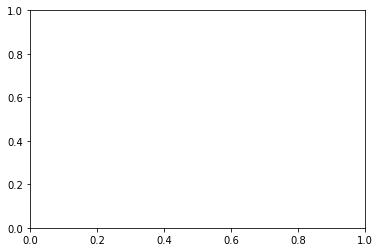

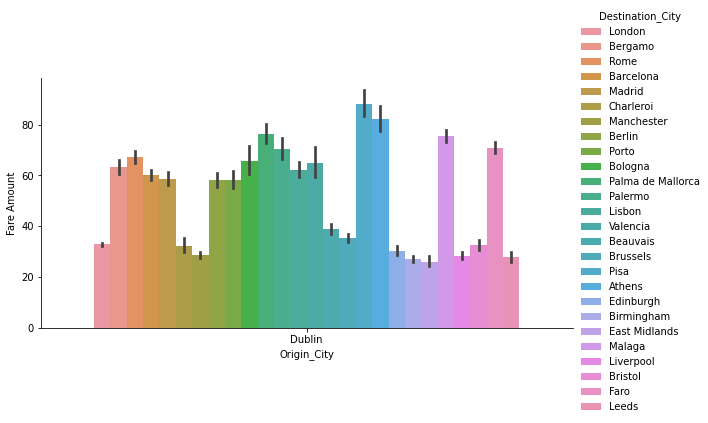

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fg = sns.factorplot(x='Origin_City',hue='Destination_City',y='Fare Amount', size=4,aspect=2,kind='bar',ax=ax, data=data1)
#a =sns.barplot(x='Origin_City',hue='Destination_City',y='Fare Amount',data=data2, ax=ax)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .01)
plt.show()

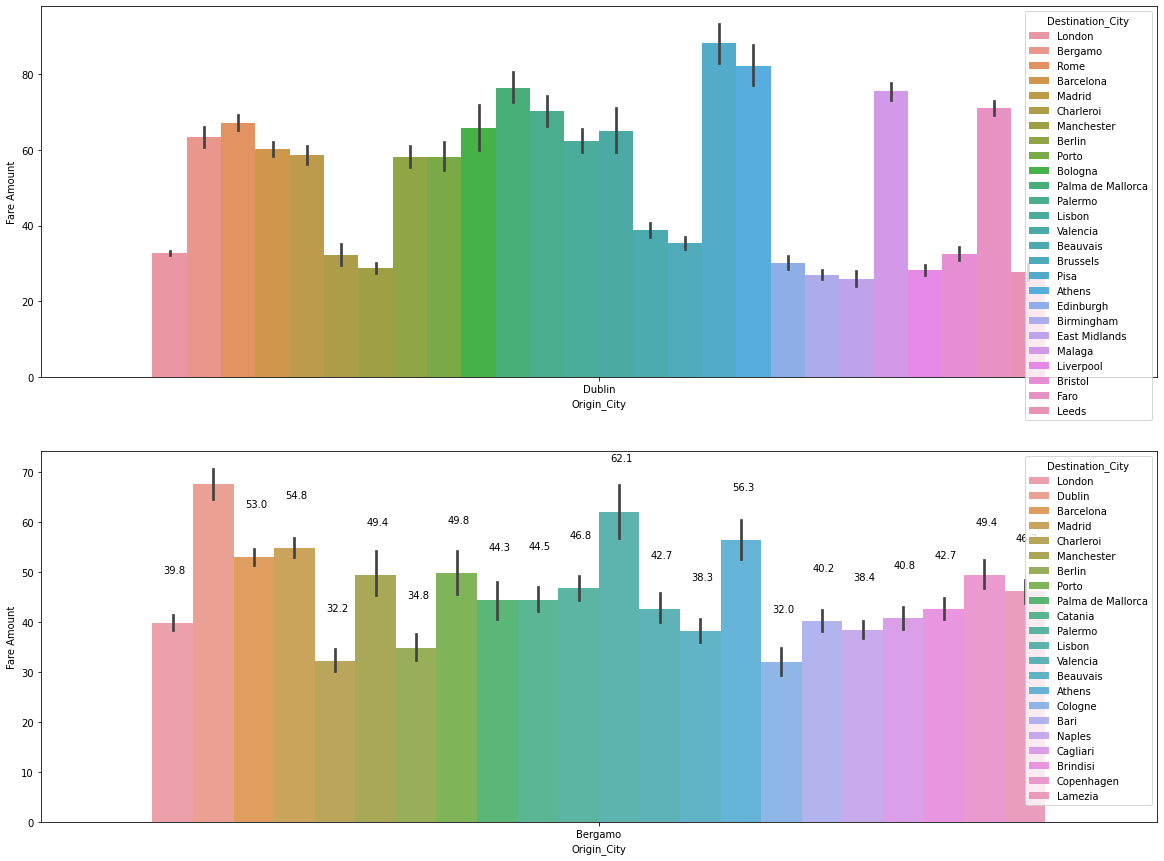

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20,15)

a =sns.barplot(x='Origin_City',hue='Destination_City',y='Fare Amount',data=data1,dodge=True,ax=axes[0])
#axes.set_box_aspect(10/len(a.patches))

a =sns.barplot(x='Origin_City',hue='Destination_City',y='Fare Amount',data=data2, alpha=0.9, ax=axes[1])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

#def change_width(axes,new_value) :
   # for patch in a.patches :
     #   current_width = patch.get_width()
        #diff = current_width - new_value

        # we change the bar width
       # patch.set_width(new_value)

        # we recenter the bar
        #patch.set_x(patch.get_x() + diff * .5)

#change_width(axes,.05)


plt.show()

In [ ]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Origin_City', 'Destination_City', 'Flight Duration', 'Departure Time', 'Arrival Time', 'Fare Class', 'origin_type', 'Destination_type']
['Booking Date', 'Date', 'Fare Amount', 'Segment Distance (km)']


In [ ]:
data[num].describe()

,Fare Amount,Segment Distance (km)
count,189392.000000,189392.000000
mean,48.570347,1018.500857
std,36.415222,507.111569
min,7.830000,201.751076
25%,26.720000,649.014814
50%,36.620000,910.242401
75%,59.390000,1379.554278
max,330.990000,2995.180798


In [ ]:
data[cat].describe().T

,count,unique,top,freq
Origin_City,189392,47,Dublin,22589
Destination_City,189392,44,London,30393
Flight Duration,189392,59,01:45,12282
Departure Time,189392,418,06:30,4419
Arrival Time,189392,428,23:40,1467
Fare Class,189392,5,PE,54601
origin_type,189392,2,High flight frequency cities,153461
Destination_type,189392,2,High flight frequency cities,161809


### Converting the classes

In [ ]:
data['Fare Class'].unique()

array(['F', 'E', 'ED', 'PE', 'BC'], dtype=object)

1. Economy without discount - E/n/l/k/q----(E)
2. Economy with discount - v/T ----(ED)
2. First Class ----(F)
3. Business class - c/s (full fare)----(BC)
4. Premium economy - w/m/h/b----(PE)

# **UNIVARIATE** **ANALYSIS**

In [ ]:
data.rename(columns={'Fare Amount':'Fare_Amount'},inplace=True)
data.rename(columns={'Date':'Journey_Date'},inplace=True)

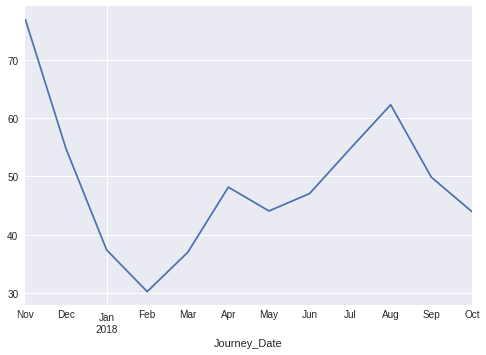

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

data.copy().set_index('Journey_Date').Fare_Amount.resample('M') \
                            .mean().plot();

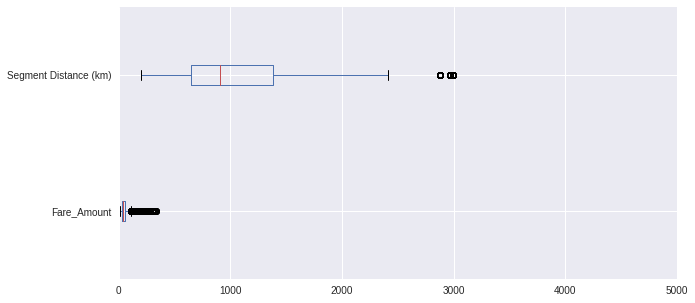

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
#data1=data
#data1.drop(['Date'],axis=1,inplace=True)
data.boxplot(vert=0)
plt.xlim(0,5000)
plt.show()

From the above output we can  see that there is outlier in so we  need to do outlier treatment to the variables

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
#median = float(df1['Segment Distance (km)'].median())
lr,ur=remove_outlier(data["Segment Distance (km)"])
data["Segment Distance (km)"]=np.where(data["Segment Distance (km)"]>ur,ur,data["Segment Distance (km)"])
data["Segment Distance (km)"]=np.where(data["Segment Distance (km)"]<lr,lr,data["Segment Distance (km)"])
lr,ur=remove_outlier(data["Fare_Amount"])
data["Fare_Amount"]=np.where(data["Fare_Amount"]>ur,ur,data["Fare_Amount"])
data["Fare_Amount"]=np.where(data["Fare_Amount"]<lr,lr,data["Fare_Amount"])
#lr,ur=remove_outlier(data["Fare Discount Pct"])
#data["Fare Discount Pct"]=np.where(data["Fare Discount Pct"]>ur,ur,data["Fare Discount Pct"])
#data["Fare Discount Pct"]=np.where(data["Fare Discount Pct"]<lr,lr,data["Fare Discount Pct"])

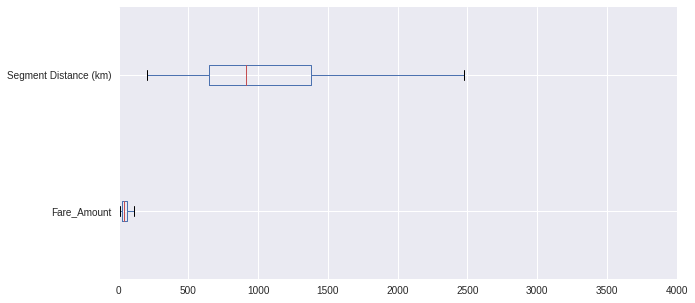

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data.boxplot(vert=0)
plt.xlim(0,4000)
plt.show()

From the above boxplot wecan find that the outlier is handled and there is  no outlier

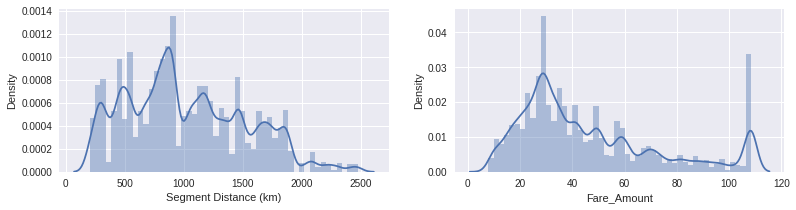

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(13,3)
a = sns.distplot(data['Segment Distance (km)'],ax=axes[0])
a = sns.distplot(data['Fare_Amount'] , ax=axes[1])
plt.show()

#### So from the above distribution graph we can see that we have Right skwness in the features like Fare Amount and Fare Published , so we need to treat the two features and change it to normal distribution for model like Linear Regression

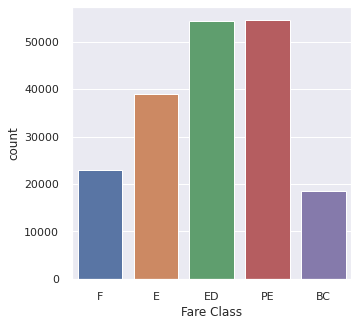

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Fare Class", data=data)
#print((((data['Fare Class'].value_counts())/len(data))*100).cumsum().head(7))

108.395      6.560995
21.990       9.106509
28.590      11.587079
28.990      13.709132
23.990      15.711329
              ...    
80.980      99.997888
47.190      99.998416
89.470      99.998944
89.440      99.999472
45.570     100.000000
Name: Fare_Amount, Length: 559, dtype: float64


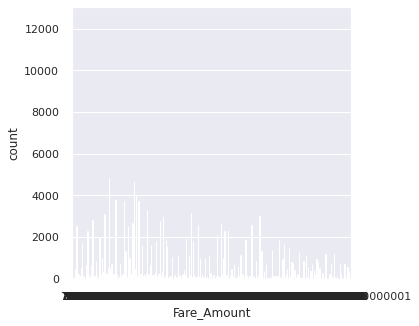

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Fare_Amount", data=data)
print((((data['Fare_Amount'].value_counts())/len(data))*100).cumsum())

Dublin       22589
Bergamo      16978
Rome         14195
Barcelona    12757
Madrid       10495
Name: Origin_City, dtype: int64


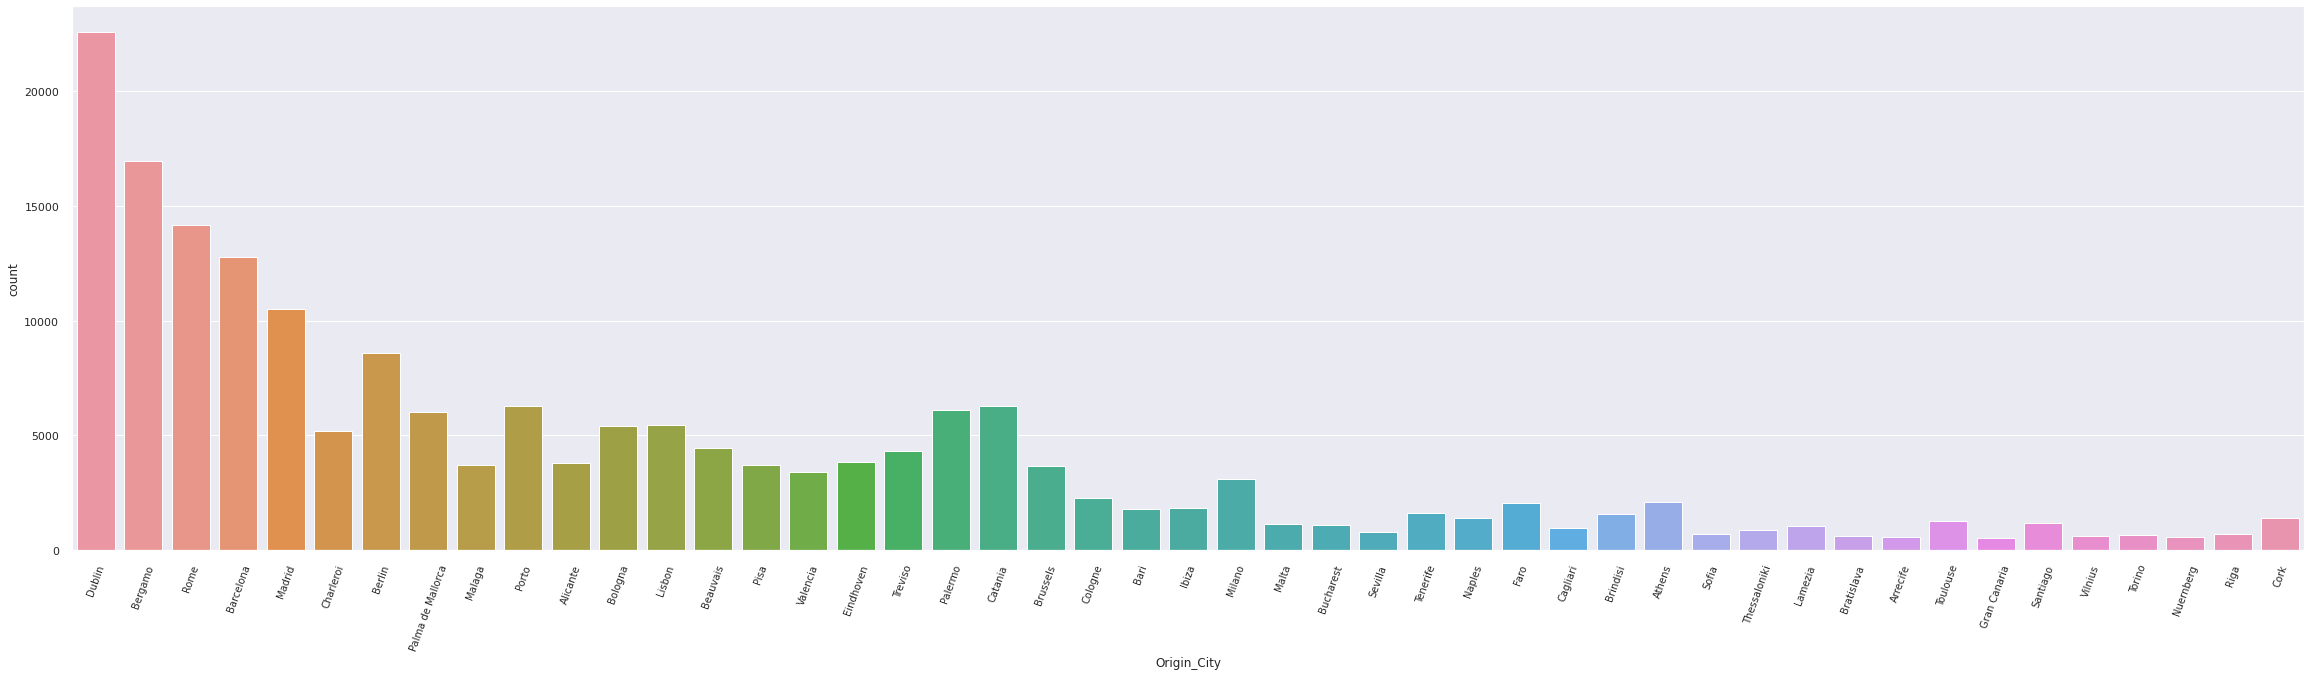

In [ ]:
import seaborn as sns
plt.figure(figsize=(40,10))
plt.xticks(rotation=70,fontsize=10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Origin_City", data=data)
#print((((data['Origin_City'].value_counts())/len(data))*100).cumsum().head(10))
print(data['Origin_City'].value_counts().head(5))

London       30393
Bergamo      15026
Rome         13466
Barcelona    11649
Madrid       11408
Name: Destination_City, dtype: int64


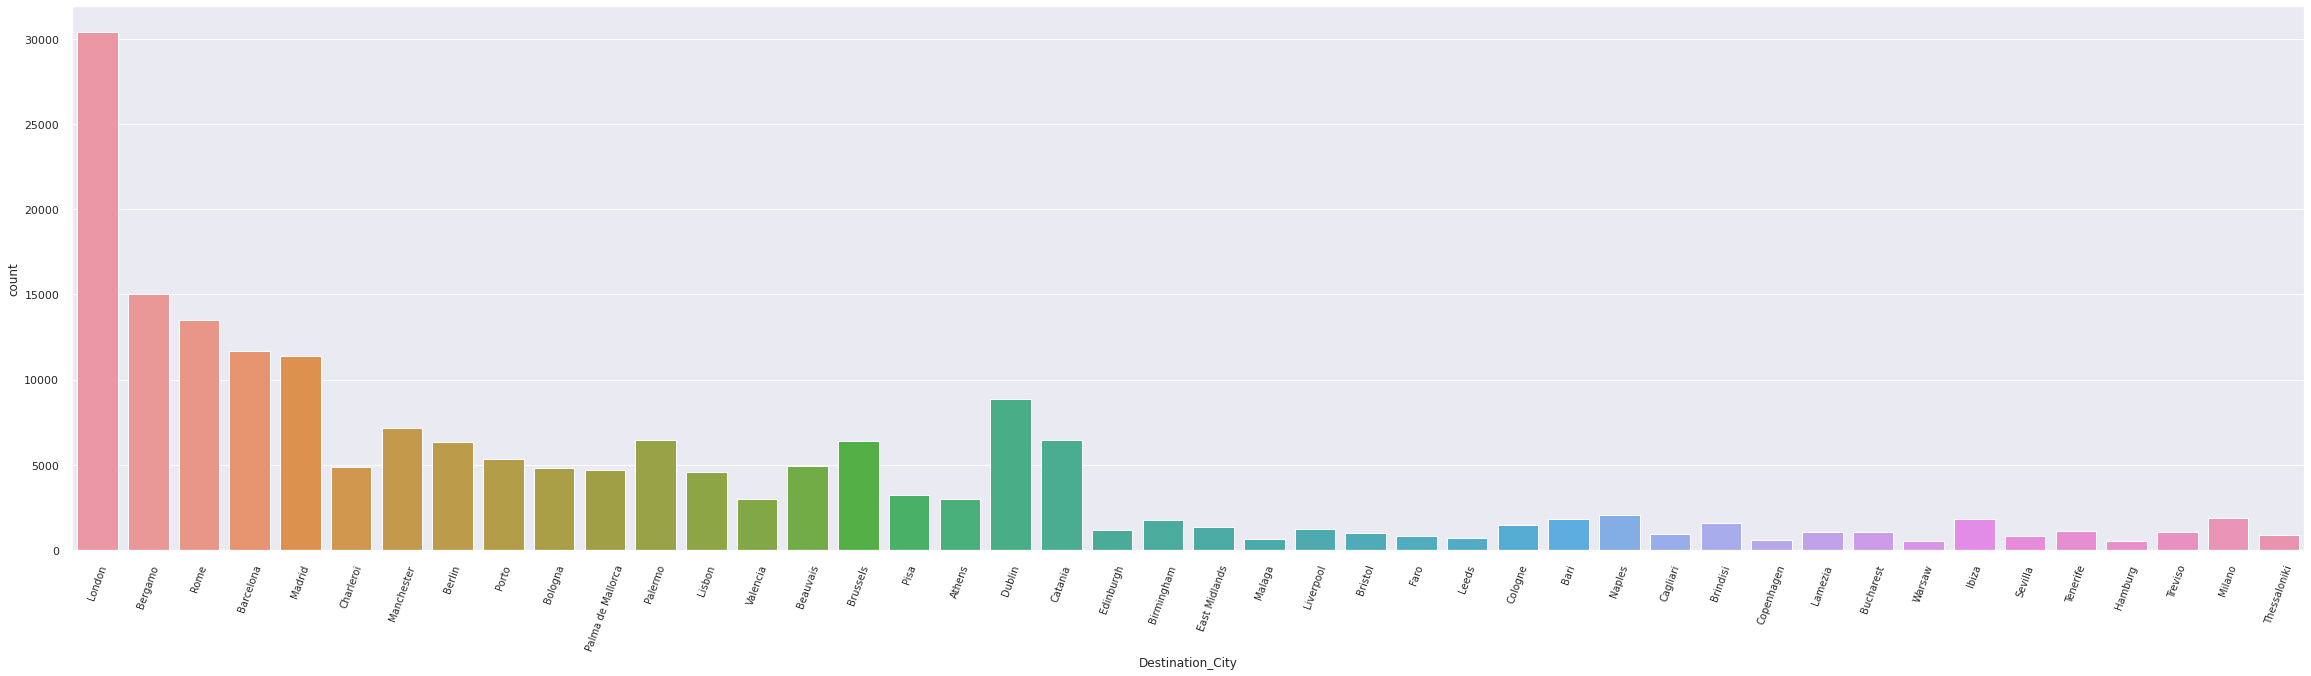

In [ ]:
import seaborn as sns
plt.figure(figsize=(40,10))
plt.xticks(rotation=70,fontsize=10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Destination_City", data=data)
#print((((data['Destination_City'].value_counts())/len(data))*100).cumsum().head(10))
print(data['Destination_City'].value_counts().head(5))

**Univariate Analysis**

*Chi 2 test for testig the independence of categorical variables*

In [ ]:
df=data[['Origin_City','Destination_City','Fare Class','Fare_Amount']]
df.head()

,Origin_City,Destination_City,Fare Class,Fare_Amount
30420,Dublin,London,F,108.395
30421,Dublin,London,F,108.395
30422,Dublin,London,F,108.395
30423,Dublin,London,F,108.395
30424,Dublin,London,F,108.395


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189392 entries, 30420 to 714832
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Origin_City       189392 non-null  object 
 1   Destination_City  189392 non-null  object 
 2   Fare Class        189392 non-null  object 
 3   Fare_Amount       189392 non-null  float64
dtypes: float64(1), object(3)
memory usage: 12.2+ MB


**TEST OF PROPORTIONS**

In [ ]:
from scipy.stats import chisquare
Fare_class=chisquare(df['Fare Class'].value_counts())
Origin_City=chisquare(df['Origin_City'].value_counts())
Destination_City=chisquare(df['Destination_City'].value_counts())

print('The test of  proportions P value  for each column respectively are:\n',Fare_class[1],Origin_City[1],Destination_City[1])

The test of  proportions P value  for each column respectively are:
 0.0 0.0 0.0


as from chi 2 test the p value is < 0.05 for all categorical variables so there is no equal proportion of all classes in the categorical variables.

**TEST OF INDEPENDENCE**

In [ ]:
df_table1=pd.crosstab(df['Destination_City'],df['Fare Class'])
df_table2=pd.crosstab(df['Origin_City'],df['Destination_City'])
df_table3=pd.crosstab(df['Origin_City'],df['Fare Class'])

In [ ]:
import scipy.stats as stats
val1=stats.chi2_contingency(df_table1)
val2=stats.chi2_contingency(df_table2)
val3=stats.chi2_contingency(df_table3)

print(val1[1],val2[1],val3[1])

0.0 0.0 0.0


H0= All categorical variables are independent of each other and doesnt affect each other
H1 - All categorical variables are dependent of each other and affect each other

From the above we can find that all categorical variables are dependent on each other it affects each other as p <0.05 ,  so we reject H0

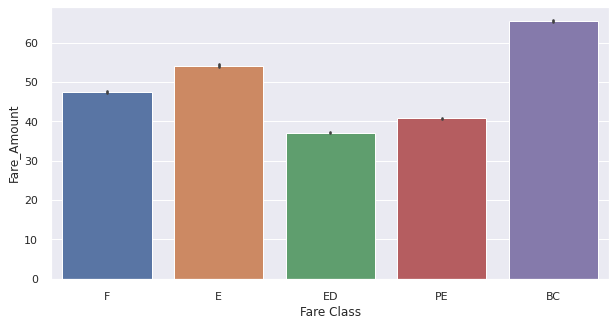

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x="Fare Class", y="Fare_Amount", data=data)

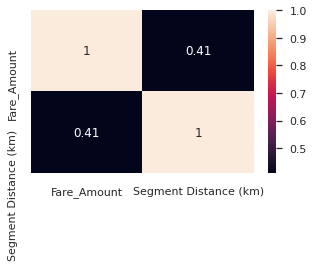

In [ ]:
df1 = data[['Fare_Amount', 'Segment Distance (km)',]]
plot.figure(figsize=(5,3))
sns.heatmap(df1.corr(),annot=True)
plot.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=df1.drop('Fare_Amount',axis=1))

Segment Distance (km)  VIF =  1.0


**MULTIVARIATE ANALYSIS**

<Figure size 360x360 with 0 Axes>

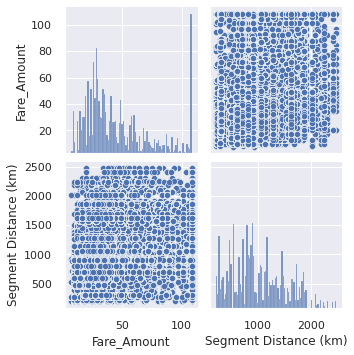

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(df1)

# **FEATURE ENGINEERING**

In [ ]:
for column in data.columns:
    if data[column].dtype =='object':
        print(column.upper(),': ',data[column].nunique())
        #print(data[column].value_counts().sort_values())
        #print('\n')

ORIGIN_CITY :  47
DESTINATION_CITY :  44
FLIGHT DURATION :  59
DEPARTURE TIME :  418
ARRIVAL TIME :  428
FARE CLASS :  5
ORIGIN_TYPE :  2
DESTINATION_TYPE :  2


In [ ]:
data['Date Diff']=(data['Journey_Date'] - data['Booking Date']).dt.days
data.drop(['Booking Date'],axis=1,inplace=True)
data.head(2)

,Journey_Date,Origin_City,Destination_City,Flight Duration,Departure Time,Arrival Time,Fare Class,Fare_Amount,Segment Distance (km),origin_type,Destination_type,Date Diff
30420,2018-01-01,Dublin,London,01:25,11:20:00,12:45:00,F,108.395,485.675897,High flight frequency cities,High flight frequency cities,235
30421,2018-01-01,Dublin,London,01:30,12:50:00,14:20:00,F,108.395,485.675897,High flight frequency cities,High flight frequency cities,235


In [ ]:
import datetime as dt
data['Journey_month'] = data['Journey_Date'].dt.strftime('%B')
data['Journey_year'] = data['Journey_Date'].dt.strftime('%Y')
data['Journey_weekday'] = data['Journey_Date'].dt.strftime('%A')
data.drop(['Journey_Date'],axis=1,inplace=True)

In [ ]:
#ading new column day type
data['Day_type'] = ['Holiday' if x ==['Saturday'] else 'Weekday' for x in data['Journey_weekday']]
data.loc[data.Journey_weekday == "Sunday", "Day_type"] = "Weekend"
data.loc[data.Journey_weekday == "Saturday","Day_type"] = "Weekend"
data.drop(['Journey_weekday'],axis=1,inplace=True)
data.drop(['Journey_year'],axis=1,inplace=True)
data.head(2)

,Origin_City,Destination_City,Flight Duration,Departure Time,Arrival Time,Fare Class,Fare_Amount,Segment Distance (km),origin_type,Destination_type,Date Diff,Journey_month,Day_type
30420,Dublin,London,01:25,11:20:00,12:45:00,F,108.395,485.675897,High flight frequency cities,High flight frequency cities,235,January,Weekday
30421,Dublin,London,01:30,12:50:00,14:20:00,F,108.395,485.675897,High flight frequency cities,High flight frequency cities,235,January,Weekday


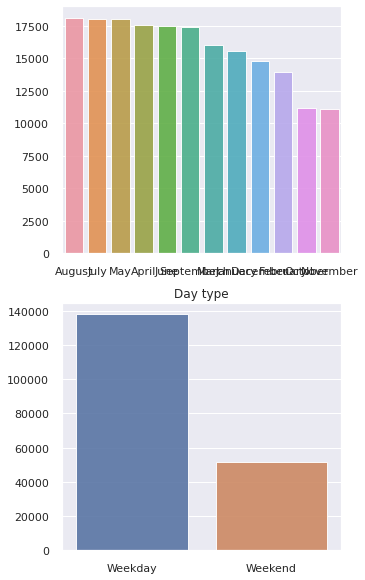

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
Journeymonth_count = data['Journey_month'].value_counts()
daytype_count = data['Day_type'].value_counts()

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(5,10)

a =sns.barplot(Journeymonth_count.index,Journeymonth_count.values, alpha=0.9, ax=axes[0])
plt.title('Journey Month')

a =sns.barplot(daytype_count.index,daytype_count.values, alpha=0.9, ax=axes[1])
plt.title('Day type')

plt.show()

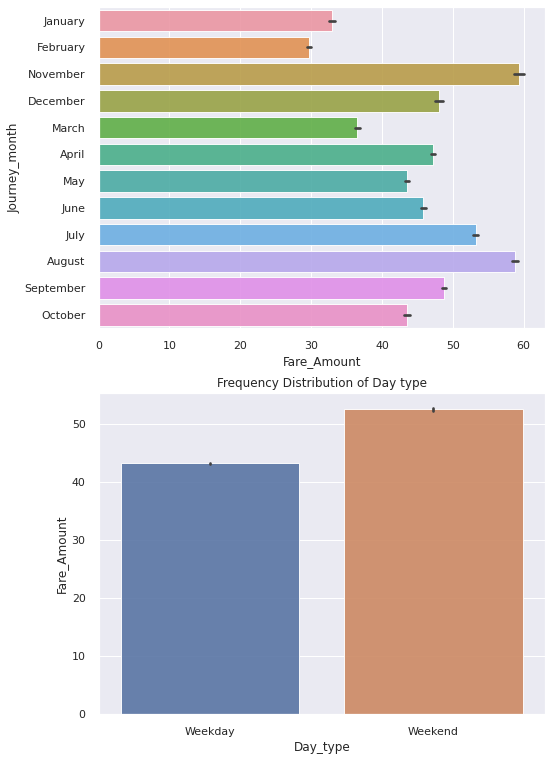

In [ ]:
#sns.barplot(x="Destination_Country", y="Fare Amount",data=data)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(8,13)

a =sns.barplot(y="Journey_month", x="Fare_Amount",data=data, alpha=0.9, ax=axes[0])
plt.title('Frequency Distribution of Journey Weekday')

a =sns.barplot(x="Day_type", y="Fare_Amount",data=data,alpha=0.9, ax=axes[1])
plt.title('Frequency Distribution of Day type')

plt.show()

In [ ]:
#Two Way Anova Test
import statsmodels.api as sm
from statsmodels.formula.api import ols
data.rename(columns={'Fare Amount':'Fare_Amount'},inplace=True)
formula2 = 'Fare_Amount ~ C(Day_type) + C(Journey_month) + C(Journey_month):C(Day_type)'
model2= ols(formula2, data).fit()
aov_table = sm.stats.anova_lm(model2,typ=2)
print(aov_table)

                                    sum_sq  ...         PR(>F)
C(Day_type)                   3.278902e+06  ...   0.000000e+00
C(Journey_month)              1.411228e+07  ...   0.000000e+00
C(Journey_month):C(Day_type)  5.704684e+05  ...  3.941070e-187
Residual                      1.190116e+08  ...            NaN

[4 rows x 4 columns]


As we can see from the above Anova Test that the fare amount is affected  when there is interaction between the type of jouney year, month,weekday and day type. but individually each variable doesnot affect the fare amount.

SO these variables are important for our model building

In [ ]:
data['Journey_month'].replace({'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11},inplace=True)
data['Day_type'].replace({'Normal':0,'Holiday':1},inplace=True)

In [ ]:
data['Departure Time']=data['Departure Time'].astype('str')
data['Arrival Time']=data['Arrival Time'].astype('str')

import datetime as dt
data['Departuretimeformat']=pd.to_datetime(data['Departure Time'])
data['Arrivaltimeformat']=pd.to_datetime(data['Arrival Time'])

In [ ]:
data['Departuretime_Hr'] = data['Departuretimeformat'].dt.strftime('%H')
data['Arrivaltime_Hr'] = data['Arrivaltimeformat'].dt.strftime('%H')
data.drop(['Departure Time','Arrival Time','Departuretimeformat','Arrivaltimeformat'],axis=1,inplace=True)
data.head(2)

,Origin_City,Destination_City,Flight Duration,Fare Class,Fare_Amount,Segment Distance (km),origin_type,Destination_type,Date Diff,Journey_month,Day_type,Departuretime_Hr,Arrivaltime_Hr
30420,Dublin,London,01:25,F,108.395,485.675897,High flight frequency cities,High flight frequency cities,235,0,Weekday,11,12
30421,Dublin,London,01:30,F,108.395,485.675897,High flight frequency cities,High flight frequency cities,235,0,Weekday,12,14


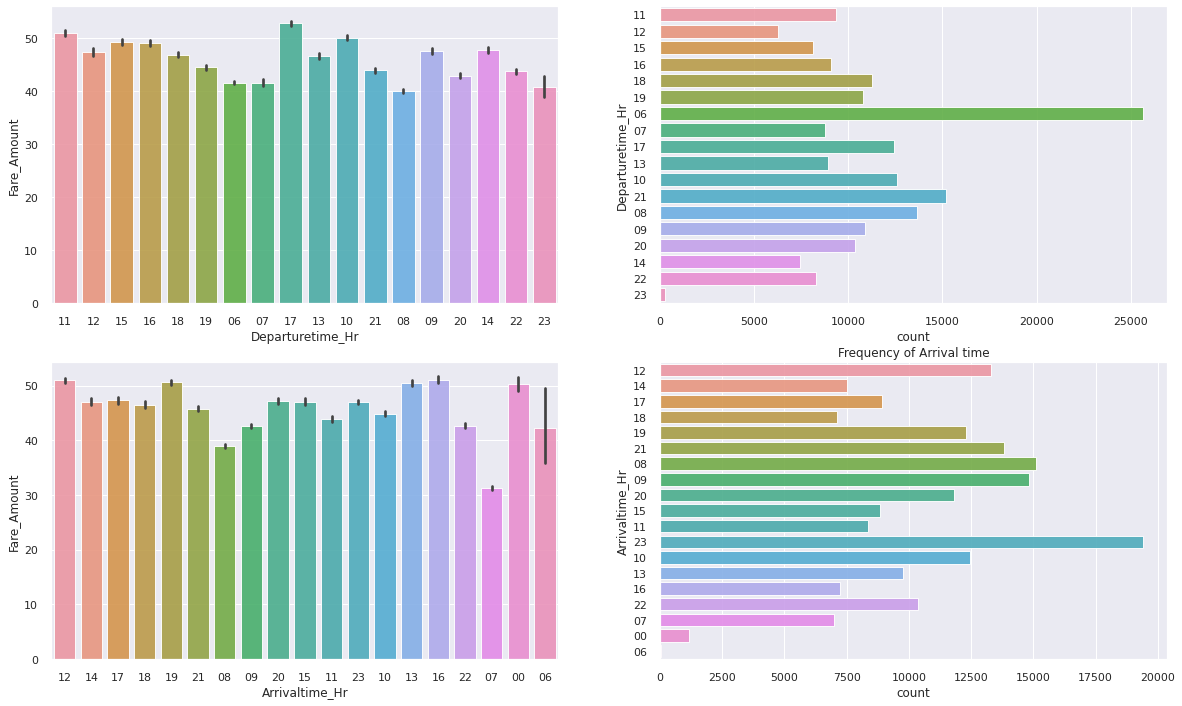

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,12)

a =sns.barplot(x="Departuretime_Hr", y="Fare_Amount",data=data,alpha=0.9, ax=axes[0][0])
plt.title('Frequency Distribution of Departure Time')

a =sns.countplot(y="Departuretime_Hr",data=data, alpha=0.9, ax=axes[0][1])
plt.title('Frequency of Departure time')

a =sns.barplot(x="Arrivaltime_Hr", y="Fare_Amount",data=data,alpha=0.9, ax=axes[1][0])
plt.title('Frequency Distribution of Arrival time')

a =sns.countplot(y="Arrivaltime_Hr",data=data, alpha=0.9, ax=axes[1][1])
plt.title('Frequency of Arrival time')



plt.show()

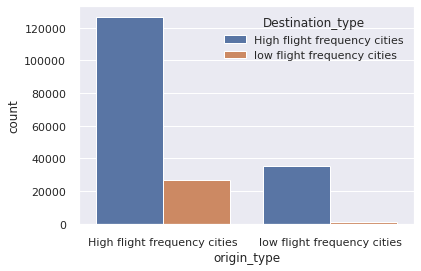

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="origin_type",hue='Destination_type',data=data)



Text(0.5, 1.0, 'Frequency of Destination_type')

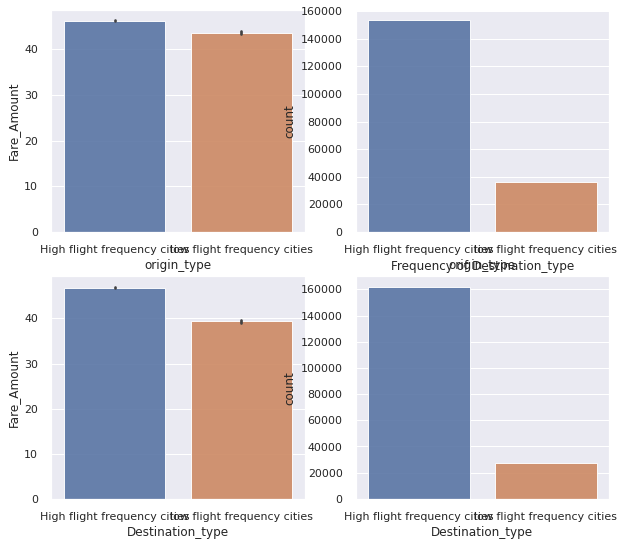

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,9)

a =sns.barplot(x="origin_type", y="Fare_Amount",data=data,alpha=0.9, ax=axes[0][0])

plt.title('Frequency Distribution of origin_type')

a =sns.countplot(x="origin_type",data=data, alpha=0.9, ax=axes[0][1])
plt.title('Frequency of origin_type')

a =sns.barplot(x="Destination_type", y="Fare_Amount",data=data,alpha=0.9, ax=axes[1][0])
plt.title('Frequency Distribution of Destination_type')

a =sns.countplot(x="Destination_type",data=data, alpha=0.9, ax=axes[1][1])
plt.title('Frequency of Destination_type')

High flight frequency cities    153461
low flight frequency cities      35931
Name: origin_type, dtype: int64


<function matplotlib.pyplot.show>

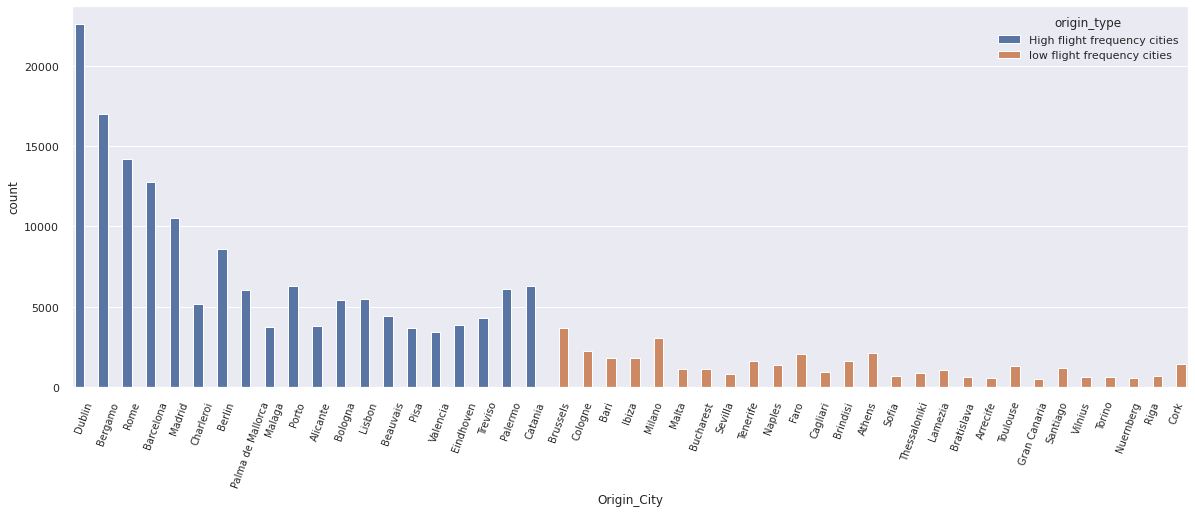

In [ ]:
import matplotlib.pyplot as plt
print(data['origin_type'].value_counts())
plt.figure(figsize=(20,7))
sns.countplot(hue="origin_type", x="Origin_City",data=data)
plt.xticks(rotation=70,fontsize=10)
plt.show

High flight frequency cities    161809
low flight frequency cities      27583
Name: Destination_type, dtype: int64


<function matplotlib.pyplot.show>

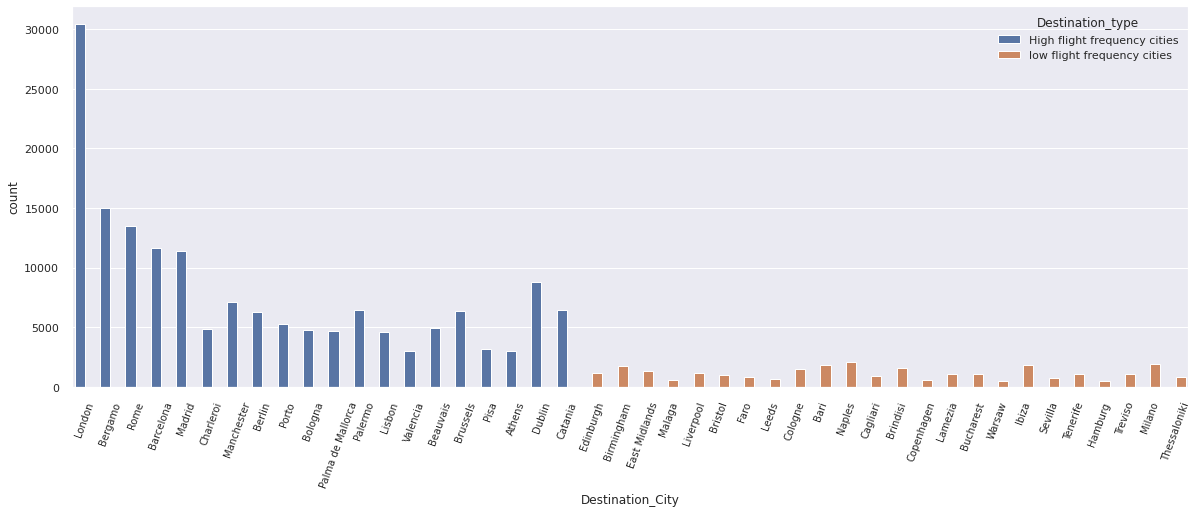

In [ ]:
import matplotlib.pyplot as plt
print(data['Destination_type'].value_counts())

plt.figure(figsize=(20,7))
sns.countplot(hue="Destination_type", x="Destination_City",data=data)
plt.xticks(rotation=70,fontsize=10)
plt.show

In [ ]:
data['Flight Duration']=data['Flight Duration'].astype('str')

In [ ]:
import datetime as dt
data['FlightdurationTimeFormat']=pd.to_datetime(data['Flight Duration'])

In [ ]:
data['Flight Duration_Min'] = data['FlightdurationTimeFormat'].dt.strftime('%M')
data['Flight Duration_Hr'] = data['FlightdurationTimeFormat'].dt.strftime('%H')
data['Duration_in_minutes']=((pd.to_numeric(data['Flight Duration_Hr'])) *60) + (pd.to_numeric(data['Flight Duration_Min']))
data.drop(['Flight Duration_Hr','Flight Duration_Min','FlightdurationTimeFormat','Flight Duration'],axis=1,inplace=True)

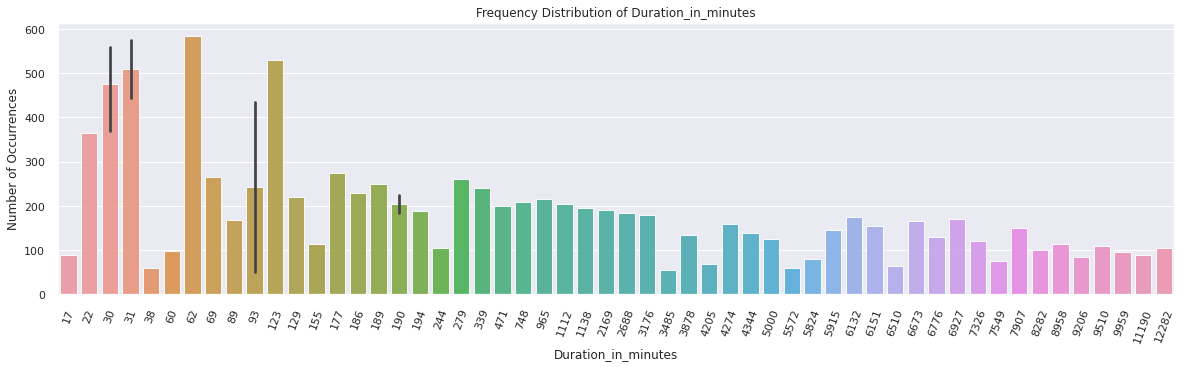

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
FareClass_count = data['Duration_in_minutes'].value_counts()
sns.set(style="darkgrid")
sns.barplot(FareClass_count.values,FareClass_count.index, alpha=0.9)
plt.title('Frequency Distribution of Duration_in_minutes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Duration_in_minutes', fontsize=12)
plt.xticks(rotation=70)

plt.show()

**INFERENTIAL ANALYSIS**

In [ ]:
from scipy.stats import shapiro,levene,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,ttest_ind,ttest_1samp,wilcoxon,mannwhitneyu
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats.mstats import kruskalwallis
from scipy import stats

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189392 entries, 30420 to 714832
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Origin_City            189392 non-null  object 
 1   Destination_City       189392 non-null  object 
 2   Fare Class             189392 non-null  object 
 3   Fare_Amount            189392 non-null  float64
 4   Segment Distance (km)  189392 non-null  float64
 5   origin_type            189392 non-null  object 
 6   Destination_type       189392 non-null  object 
 7   Date Diff              189392 non-null  int64  
 8   Journey_month          189392 non-null  int64  
 9   Day_type               189392 non-null  object 
 10  Departuretime_Hr       189392 non-null  object 
 11  Arrivaltime_Hr         189392 non-null  object 
 12  Duration_in_minutes    189392 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 25.2+ MB


# ***TWO WAY ANOVA***

> For Analyising the sample mean/ variance of the classes in the independent categorical variables with respect to continuous dependent variable



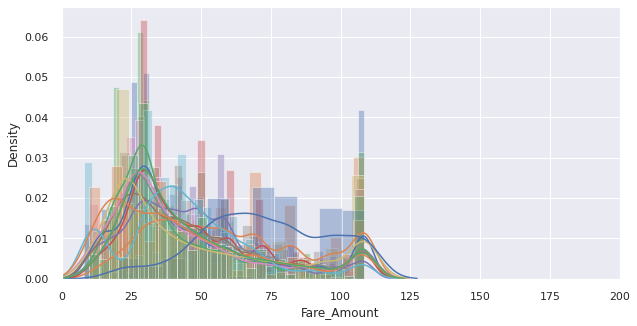

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Destination_City"] == 'London']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Dublin']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Bergamo']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Rome']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Barcelona']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Madrid']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Charleroi']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Berlin']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Manchester']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Palma de Mallorca']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Malaga']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Porto']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Bologna']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Krakow']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Destcity(others)']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

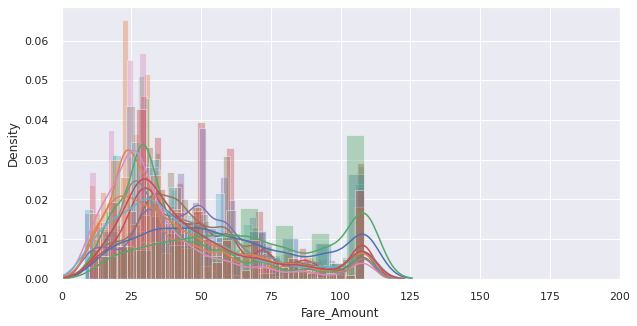

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Origin_City"] == 'London']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Dublin']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Bergamo']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Rome']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Barcelona']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Madrid']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Charleroi']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Berlin']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Manchester']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Palma de Mallorca']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Malaga']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Porto']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Alicante']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Bologna']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Krakow']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'origincity(others)']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

In [ ]:
data['Fare Class'].value_counts()

PE    54601
ED    54386
E     38925
F     23048
BC    18432
Name: Fare Class, dtype: int64

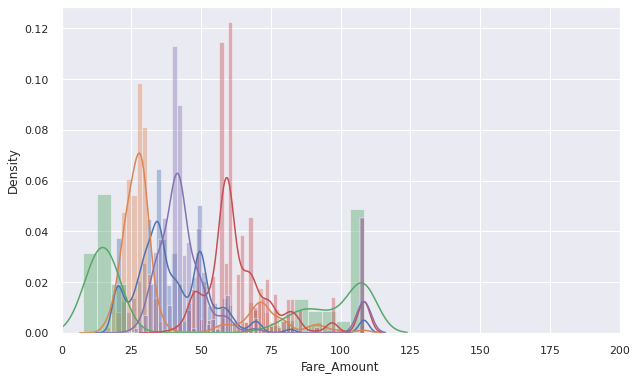

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data.loc[data["Fare Class"] == 'PE']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'ED']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'E']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'BC']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'F']["Fare_Amount"])

plt.xlim([0, 200])
plt.show()


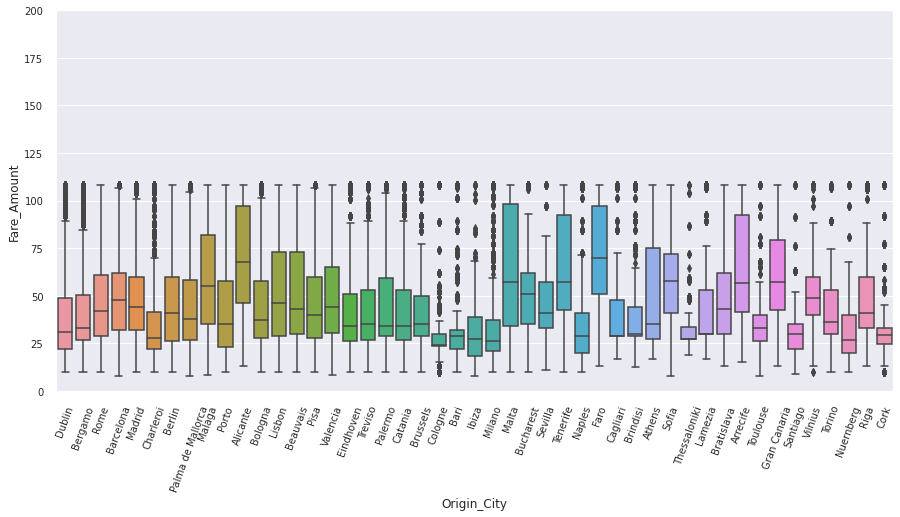

In [ ]:
plt.figure(figsize=(15,7))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
sns.boxplot(data['Origin_City'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

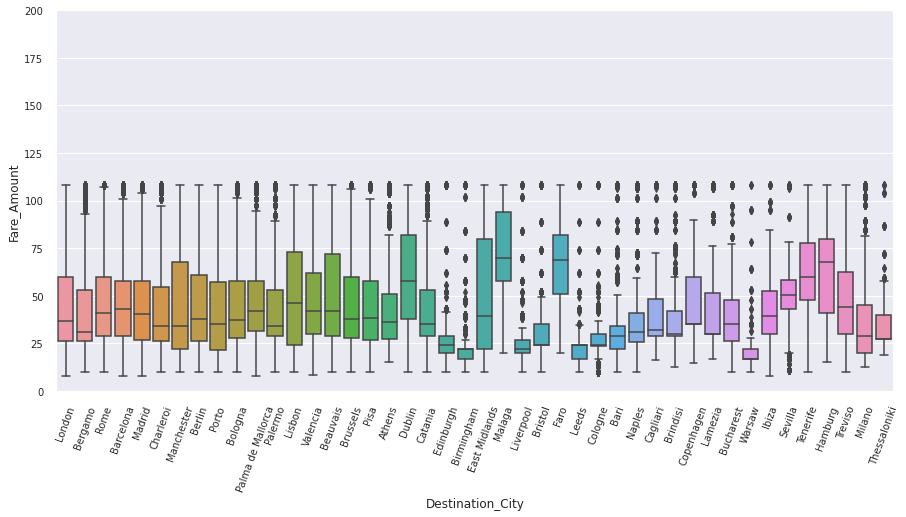

In [ ]:
plt.figure(figsize=(15,7))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
sns.boxplot(data['Destination_City'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

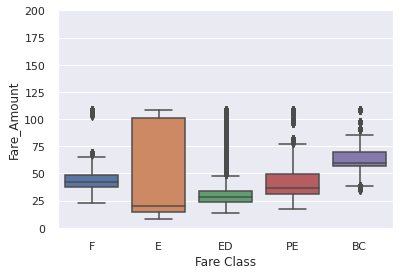

In [ ]:
sns.boxplot(data['Fare Class'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

In [ ]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
## For changing all object datatype to category for anova test

#for col in data.drop("Service Time",axis=1).columns:
    #data[col] = data[col].astype('category',copy=False)

##Replace Fare Published With Fare_Published (space with '_') as some of the formula will not recognize space in columns

#data.rename(columns={'Fare Amount':'Fare_Amount'},inplace=True)
data.rename(columns={'Fare Class':'Fare_Class'},inplace=True)
data.rename(columns={'Fare Currency':'Fare_Currency'},inplace=True)

# Anova test with interaction
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula1 = 'Fare_Amount ~ C(Destination_City) + C(Fare_Class) + C(Origin_City)'
model = ols(formula1,data).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
print(aov_table)

                           sum_sq        df            F  PR(>F)
C(Destination_City)  5.427235e+06      43.0   223.296885     0.0
C(Fare_Class)        1.191581e+07       4.0  5270.307985     0.0
C(Origin_City)       8.184290e+06      46.0   314.771687     0.0
Residual             1.069975e+08  189298.0          NaN     NaN


From the above ANOVA test wecan find that all the P values are < 0.05 so we reject H0 - that  is the population mean are not same for all categorical variables with respect to Fare Published . That is the variables affect the target variable  individually and also during interaction, so each variable affect the increase or decrease in the fare amount, so all variables are important


In [ ]:
data= pd.get_dummies(data,prefix=['Origin_City','Destination_City','origin_type','Destination_type'],columns=['Origin_City','Destination_City','origin_type','Destination_type'], drop_first=True)
data.head(2)

,Fare_Class,Fare_Amount,Segment Distance (km),Date Diff,Journey_month,Day_type,Departuretime_Hr,Arrivaltime_Hr,Duration_in_minutes,Origin_City_Arrecife,Origin_City_Athens,Origin_City_Barcelona,Origin_City_Bari,Origin_City_Beauvais,Origin_City_Bergamo,Origin_City_Berlin,Origin_City_Bologna,Origin_City_Bratislava,Origin_City_Brindisi,Origin_City_Brussels,Origin_City_Bucharest,Origin_City_Cagliari,Origin_City_Catania,Origin_City_Charleroi,Origin_City_Cologne,Origin_City_Cork,Origin_City_Dublin,Origin_City_Eindhoven,Origin_City_Faro,Origin_City_Gran Canaria,Origin_City_Ibiza,Origin_City_Lamezia,Origin_City_Lisbon,Origin_City_Madrid,Origin_City_Malaga,Origin_City_Malta,Origin_City_Milano,Origin_City_Naples,Origin_City_Nuernberg,Origin_City_Palermo,Origin_City_Palma de Mallorca,Origin_City_Pisa,Origin_City_Porto,Origin_City_Riga,Origin_City_Rome,Origin_City_Santiago,Origin_City_Sevilla,Origin_City_Sofia,Origin_City_Tenerife,Origin_City_Thessaloniki,Origin_City_Torino,Origin_City_Toulouse,Origin_City_Treviso,Origin_City_Valencia,Origin_City_Vilnius,Destination_City_Barcelona,Destination_City_Bari,Destination_City_Beauvais,Destination_City_Bergamo,Destination_City_Berlin,Destination_City_Birmingham,Destination_City_Bologna,Destination_City_Brindisi,Destination_City_Bristol,Destination_City_Brussels,Destination_City_Bucharest,Destination_City_Cagliari,Destination_City_Catania,Destination_City_Charleroi,Destination_City_Cologne,Destination_City_Copenhagen,Destination_City_Dublin,Destination_City_East Midlands,Destination_City_Edinburgh,Destination_City_Faro,Destination_City_Hamburg,Destination_City_Ibiza,Destination_City_Lamezia,Destination_City_Leeds,Destination_City_Lisbon,Destination_City_Liverpool,Destination_City_London,Destination_City_Madrid,Destination_City_Malaga,Destination_City_Manchester,Destination_City_Milano,Destination_City_Naples,Destination_City_Palermo,Destination_City_Palma de Mallorca,Destination_City_Pisa,Destination_City_Porto,Destination_City_Rome,Destination_City_Sevilla,Destination_City_Tenerife,Destination_City_Thessaloniki,Destination_City_Treviso,Destination_City_Valencia,Destination_City_Warsaw,origin_type_low flight frequency cities,Destination_type_low flight frequency cities
30420,F,108.395,485.675897,235,0,Weekday,11,12,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30421,F,108.395,485.675897,235,0,Weekday,12,14,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data= pd.get_dummies(data,prefix=['Fare_Class'],columns=['Fare_Class'], drop_first=True)

In [ ]:
data['Departuretime_Hr'] = data['Departuretime_Hr'].astype(int)
data['Arrivaltime_Hr'] = data['Arrivaltime_Hr'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189392 entries, 30420 to 714832
Columns: 103 entries, Fare_Amount to Fare_Class_PE
dtypes: float64(2), int64(5), object(1), uint8(95)
memory usage: 35.2+ MB


In [ ]:
data.shape #final data fro modelling

(189392, 103)

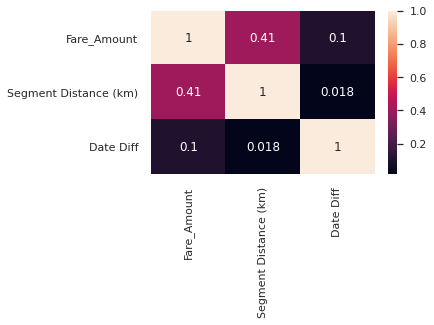

In [ ]:
import matplotlib.pyplot as plt

df1 = data[['Fare_Amount', 'Segment Distance (km)','Date Diff']]
plot.figure(figsize=(5,3))
sns.heatmap(df1.corr(),annot=True)
plt.show()

<Figure size 360x360 with 0 Axes>

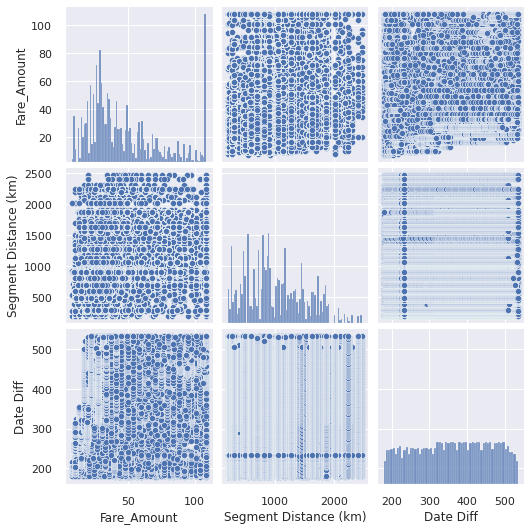

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(df1)
plt.show()

rom sklearn import preprocessing
import numpy as np
x_array = np.array([2,3,5,6,7,4,8,7,6])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

In [ ]:
X = data.drop('Fare_Amount' , axis=1)

Y = data.Fare_Amount

from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler()
num_norm = X_norm.fit_transform(X)
X2 = pd.DataFrame(num_norm, columns = X.columns)
X2.head()



from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,Y)
reg.score(X,Y)

In [ ]:
import statsmodels.api as sm
# This adds the constant term beta0 to the Multiple Linear Regression.

X_1 =sm.add_constant(X)
X_1.head()

,const,Segment Distance (km),Date Diff,Journey_month,Day_type,Departuretime_Hr,Arrivaltime_Hr,Duration_in_minutes,Origin_City_Arrecife,Origin_City_Athens,Origin_City_Barcelona,Origin_City_Bari,Origin_City_Beauvais,Origin_City_Bergamo,Origin_City_Berlin,Origin_City_Bologna,Origin_City_Bratislava,Origin_City_Brindisi,Origin_City_Brussels,Origin_City_Bucharest,Origin_City_Cagliari,Origin_City_Catania,Origin_City_Charleroi,Origin_City_Cologne,Origin_City_Cork,Origin_City_Dublin,Origin_City_Eindhoven,Origin_City_Faro,Origin_City_Gran Canaria,Origin_City_Ibiza,Origin_City_Lamezia,Origin_City_Lisbon,Origin_City_Madrid,Origin_City_Malaga,Origin_City_Malta,Origin_City_Milano,Origin_City_Naples,Origin_City_Nuernberg,Origin_City_Palermo,Origin_City_Palma de Mallorca,Origin_City_Pisa,Origin_City_Porto,Origin_City_Riga,Origin_City_Rome,Origin_City_Santiago,Origin_City_Sevilla,Origin_City_Sofia,Origin_City_Tenerife,Origin_City_Thessaloniki,Origin_City_Torino,Origin_City_Toulouse,Origin_City_Treviso,Origin_City_Valencia,Origin_City_Vilnius,Destination_City_Barcelona,Destination_City_Bari,Destination_City_Beauvais,Destination_City_Bergamo,Destination_City_Berlin,Destination_City_Birmingham,Destination_City_Bologna,Destination_City_Brindisi,Destination_City_Bristol,Destination_City_Brussels,Destination_City_Bucharest,Destination_City_Cagliari,Destination_City_Catania,Destination_City_Charleroi,Destination_City_Cologne,Destination_City_Copenhagen,Destination_City_Dublin,Destination_City_East Midlands,Destination_City_Edinburgh,Destination_City_Faro,Destination_City_Hamburg,Destination_City_Ibiza,Destination_City_Lamezia,Destination_City_Leeds,Destination_City_Lisbon,Destination_City_Liverpool,Destination_City_London,Destination_City_Madrid,Destination_City_Malaga,Destination_City_Manchester,Destination_City_Milano,Destination_City_Naples,Destination_City_Palermo,Destination_City_Palma de Mallorca,Destination_City_Pisa,Destination_City_Porto,Destination_City_Rome,Destination_City_Sevilla,Destination_City_Tenerife,Destination_City_Thessaloniki,Destination_City_Treviso,Destination_City_Valencia,Destination_City_Warsaw,origin_type_low flight frequency cities,Destination_type_low flight frequency cities,Fare_Class_E,Fare_Class_ED,Fare_Class_F,Fare_Class_PE
30420,1.0,485.675897,235,0,Weekday,11,12,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30421,1.0,485.675897,235,0,Weekday,12,14,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30422,1.0,485.675897,235,0,Weekday,15,17,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30423,1.0,485.675897,235,0,Weekday,16,18,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30424,1.0,485.675897,235,0,Weekday,18,19,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
model = sm.OLS(X_1,Y).fit()
model.summary()

ValueError: ignored

In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X = data.drop(['Fare_Amount'],axis=1)
y = data['Fare_Amount']

scaledX = scale.fit_transform(X)

#regr = linear_model.LinearRegression()
#regr.fit(scaledX, y)

#scaled = scale.transform([[2300, 1.3]])

#predictedCO2 = regr.predict([scaled[0]])
#print(predictedCO2)

In [ ]:
import statsmodels.api as sm
# This adds the constant term beta0 to the Multiple Linear Regression.

X_1 =sm.add_constant(scaledX)

In [ ]:
model = sm.OLS(X_1,Y).fit()
model.summary()

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon,mannwhitneyu,chisquare,chi2_contingency,shapiro,levene
print(shapiro(data['Fare_Amount']))
print(shapiro(data['Segment Distance (km)']))

In [ ]:
data.to_csv("data.csv",index=False)


In [ ]:
ls

In [ ]:
cat data (1).csv


In [ ]:
! zip data.zip *.csv

#To Download the transformed file to the google drive
1.data.to_csv("data.csv",index=False)
2.ls
3.cat data.csv
4.! zip data.zip *.csv